In [1]:
import csv
import random
import math
import operator
import pandas_datareader.data as web
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import json

In [2]:
def loadDataset(filename, split, trainingSet=[], testSet=[], content_header=[]):
    a = csv.reader(open(filename,'r'))
    dataset = []
    for i in a:
        dataset.append(i)
    
    for x in range(len(dataset) - 1):
        for y in range(1, len(content_header) - 1):
            dataset[x][y] = float(dataset[x][y])
        if random.random() < split:
            trainingSet.append(dataset[x])
        else:
            testSet.append(dataset[x])

In [3]:
def euclideanDistance(instance1, instance2, length):
    distance = 0
    for x in range(1, length):
        distance += pow((instance1[x] - instance2[x]), 2)
    return math.sqrt(distance)

In [4]:
# get k nearest neighbors of the <array><num> testInstance among <array><array>
# trainingSet
def getNeighbors(trainingSet, testInstance, k):
    distance = []
    # minus 1 because we are splitting our data and test also has known class
    length = len(testInstance) - 1

    for x in range((len(trainingSet))):
        dist = euclideanDistance(testInstance, trainingSet[x], length)
        distance.append((trainingSet[x], dist))
    # sort based on the the item at index 1 i.e the distance
    distance.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distance[x][0])
    return neighbors

In [5]:
# make all responses vote their classification, the one with the highest vote
# wins
def getResponse(neighbors):
    classVotes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0]

In [6]:
def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x][-1] == predictions[x]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0

In [7]:
def getAccuracy1(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if RMSD(testSet[x][-1], predictions[x]) < 1:
            correct += 1
    return (correct/float(len(testSet))) * 100.0

In [8]:
def RMSD(X, Y):
    return math.sqrt(pow(Y - X, 2))

In [10]:
def predictFor(k, filename, stockname, split):
    iv = ["date", "open", "high", "low", "yesterday closing adj", "state change"]
    trainingSet = []
    testSet = []
    totalCount = 0

    # open the file
    loadDataset(filename, split, trainingSet, testSet, iv)

    print("Predicting for ", stockname)
    print("Train: " + repr(len(trainingSet)))
    print("Test: " + repr(len(testSet)))
    totalCount += len(trainingSet) + len(testSet)
    print("Total: " + repr(totalCount))

    # generate predictions
    predict_and_get_accuracy(testSet, trainingSet, k, stockname)

In [11]:
def predict_and_get_accuracy(testSet, trainingSet, k, stockname):
    predictions = []
    for x in range(len(testSet)):
        neighbors = getNeighbors(trainingSet, testSet[x], k)
        result = getResponse(neighbors)
        predictions.append(result)

    accuracy = getAccuracy(testSet, predictions)
    print('Accuracy: ' + repr(accuracy) + '%')

    # drawing another
    plt.figure(2)
    plt.title("Prediction vs Actual Trend of " + stockname)
    plt.legend(loc="best")
    row = []
    col = []
    for dates in range(len(testSet)):
        new_date = datetime.datetime.strptime(testSet[dates][0], "%Y-%M-%d")
        row.append(new_date)
        if predictions[dates]== "down":
            col.append(-1)
        else:
            col.append(1)
    predicted_plt, = plt.plot(row, col, 'r', label="Predicted Trend")

    row = []
    col = []
    for dates in range(len(testSet)):
        new_date = datetime.datetime.strptime(testSet[dates][0], "%Y-%M-%d")
        row.append(new_date)
        if testSet[dates][-1]== "down":
            col.append(-1)
        else:
            col.append(1)
    actual_plt, = plt.plot(row, col, 'b', label="Actual Trend")

    plt.legend(handles=[predicted_plt, actual_plt])


    plt.show()

Predicting for  AMTD
Train: 3442
Test: 404
Total: 3846


No handles with labels found to put in legend.


Accuracy: 77.47524752475248%


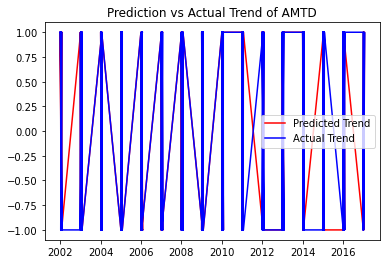

In [12]:
split = 0.90
predictFor(5, 'amtd.csv', 'AMTD', split)

Predicting for  YHOO
Train: 3454
Test: 392
Total: 3846


No handles with labels found to put in legend.


Accuracy: 76.53061224489795%


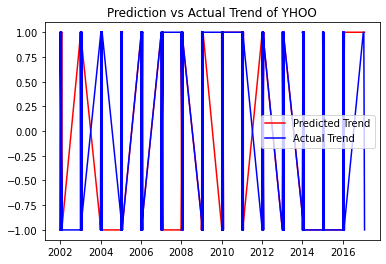

In [13]:
predictFor(5, 'yahoo.csv', 'YHOO', split)

No handles with labels found to put in legend.


Predicting for  TWTR
Train: 784
Test: 78
Total: 862
Accuracy: 70.51282051282051%


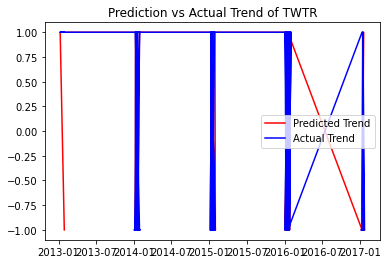

In [14]:
predictFor(5, 'twtr.csv', 'TWTR', split)

Predicting for  SBUX
Train: 3448
Test: 398
Total: 3846


No handles with labels found to put in legend.


Accuracy: 67.58793969849246%


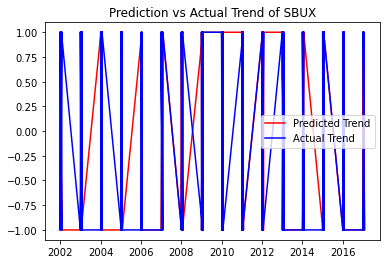

In [15]:
predictFor(5, 'sbux.csv', 'SBUX', split)

Predicting for  DIS
Train: 3465
Test: 381
Total: 3846


No handles with labels found to put in legend.


Accuracy: 67.71653543307087%


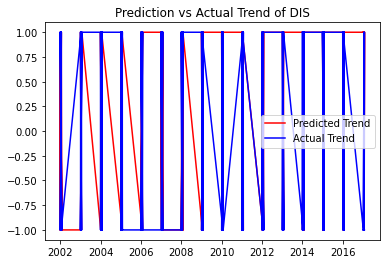

In [16]:
predictFor(5, 'disney.csv', 'DIS', split)

Predicting for  AMZN
Train: 3453
Test: 393
Total: 3846


No handles with labels found to put in legend.


Accuracy: 77.09923664122137%


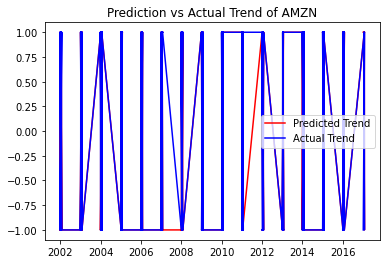

In [17]:
predictFor(5, 'amazon.csv', 'AMZN', split)